Image Color Extraction - Python Code
Author: Madhan Kumar R
Date: 15 October 2025
Install required packages first

In [1]:
!pip install -r requirements.txt

In [2]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import urllib.request
from io import BytesIO
import os

In [3]:
def load_image(url_or_path):
    """
    Load image from URL or local file path
    
    Args:
        url_or_path: Image URL (http/https) or local file path
    
    Returns:
        PIL Image object
    """
    if url_or_path.startswith(('http://', 'https://')):
        print(f"Downloading image from: {url_or_path}")
        response = urllib.request.urlopen(url_or_path)
        data = response.read()
        image = Image.open(BytesIO(data))
        print("Image downloaded successfully!")
    else:
        if not os.path.exists(url_or_path):
            raise FileNotFoundError(f"File not found: {url_or_path}")
        print(f"Loading image from: {url_or_path}")
        image = Image.open(url_or_path)
        print("Image loaded successfully!")
    
    return image.convert('RGB')


In [4]:
def extract_colors(image, n_colors=10):
    """
    Extract dominant colors using K-means clustering
    
    Args:
        image: PIL Image object
        n_colors: Number of colors to extract
    
    Returns:
        colors: Array of RGB values
        percentages: Percentage of each color in the image
    """
    print(f"Extracting {n_colors} dominant colors...")
    
    # Convert image to numpy array
    img_array = np.array(image)
    w, h, d = img_array.shape
    pixels = img_array.reshape(w * h, d)
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_colors, random_state=42, n_init=10)
    kmeans.fit(pixels)
    
    colors = kmeans.cluster_centers_.astype(int)
    labels = kmeans.labels_
    counts = np.bincount(labels)
    
    # Sort by frequency
    indices = np.argsort(-counts)
    colors = colors[indices]
    percentages = (counts[indices] / len(labels)) * 100
    
    print("Color extraction complete!")
    return colors, percentages



In [5]:
def rgb_to_hex(rgb):
    """Convert RGB to hex color code"""
    return '#{:02x}{:02x}{:02x}'.format(int(rgb[0]), int(rgb[1]), int(rgb[2]))



In [6]:
def display_results(image, colors, percentages):
    """
    Display image and color palette with hex codes
    
    Args:
        image: PIL Image object
        colors: Array of RGB values
        percentages: Percentage of each color
    """
    # Create figure with subplots
    fig = plt.figure(figsize=(16, 10))
    
    # Display original image
    ax1 = plt.subplot(2, 2, 1)
    ax1.imshow(image)
    ax1.axis('off')
    ax1.set_title('Original Image', fontsize=16, fontweight='bold', pad=20)
    
    # Display color palette
    ax2 = plt.subplot(2, 2, 2)
    ax2.axis('off')
    ax2.set_title('Extracted Color Palette', fontsize=16, fontweight='bold', pad=20)
    
    # Create color swatches
    swatch_height = 0.8
    swatch_width = 0.8
    gap = 0.1
    
    for i, (color, pct) in enumerate(zip(colors, percentages)):
        row = i // 5
        col = i % 5
        
        x = col * (swatch_width + gap)
        y = 1 - (row * (swatch_height + gap)) - swatch_height
        
        # Draw color rectangle
        rect = patches.Rectangle(
            (x, y), swatch_width, swatch_height,
            facecolor=color/255,
            edgecolor='black',
            linewidth=2
        )
        ax2.add_patch(rect)
        
        # Add hex code below swatch
        hex_code = rgb_to_hex(color)
        ax2.text(
            x + swatch_width/2, y - 0.1,
            hex_code.upper(),
            ha='center', va='top',
            fontsize=10,
            fontweight='bold'
        )
        
        # Add percentage below hex code
        ax2.text(
            x + swatch_width/2, y - 0.2,
            f'{pct:.1f}%',
            ha='center', va='top',
            fontsize=9,
            color='gray'
        )
    
    ax2.set_xlim(-0.2, 5 * (swatch_width + gap))
    ax2.set_ylim(-0.5, 2)
    
    # Display color distribution bar
    ax3 = plt.subplot(2, 1, 2)
    ax3.axis('off')
    ax3.set_title('Color Distribution', fontsize=16, fontweight='bold', pad=20)
    
    # Create horizontal bar
    left = 0
    for color, pct in zip(colors, percentages):
        ax3.barh(
            0, pct, left=left,
            color=color/255,
            height=0.5,
            edgecolor='white',
            linewidth=2
        )
        left += pct
    
    ax3.set_xlim(0, 100)
    ax3.set_ylim(-0.5, 0.5)
    
    # Add detailed information table
    info_text = f"Image Size: {image.width} x {image.height} pixels\n"
    info_text += f"Total Colors Extracted: {len(colors)}\n\n"
    info_text += "Color Details:\n"
    info_text += "-" * 60 + "\n"
    
    for i, (color, pct) in enumerate(zip(colors, percentages), 1):
        hex_code = rgb_to_hex(color)
        rgb_str = f"RGB({color[0]:3d}, {color[1]:3d}, {color[2]:3d})"
        info_text += f"{i:2d}. {hex_code.upper():8s} | {rgb_str:20s} | {pct:6.2f}%\n"
    
    plt.figtext(
        0.5, 0.02, info_text,
        ha='center',
        fontsize=10,
        family='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    )
    
    plt.tight_layout(rect=[0, 0.15, 1, 0.96])
    plt.show()


In [7]:
def print_color_info(colors, percentages):
    """
    Print color information to console
    
    Args:
        colors: Array of RGB values
        percentages: Percentage of each color
    """
    print("\n" + "="*70)
    print("EXTRACTED COLOR PALETTE")
    print("="*70)
    print(f"{'Rank':<6} {'HEX Code':<10} {'RGB Values':<25} {'Percentage':<12}")
    print("-"*70)
    
    for i, (color, pct) in enumerate(zip(colors, percentages), 1):
        hex_code = rgb_to_hex(color)
        rgb_str = f"({color[0]:3d}, {color[1]:3d}, {color[2]:3d})"
        print(f"{i:<6} {hex_code.upper():<10} {rgb_str:<25} {pct:>10.2f}%")
    
    print("="*70 + "\n")


In [8]:
# Main function to run everything
def analyze_image(url_or_path, n_colors=10):
    """
    Complete image color analysis
    
    Args:
        url_or_path: Image URL or local file path
        n_colors: Number of colors to extract (default: 10)
    """
    try:
        # Load image
        image = load_image(url_or_path)
        
        # Extract colors
        colors, percentages = extract_colors(image, n_colors)
        
        # Print color information
        print_color_info(colors, percentages)
        
        # Display visual results
        display_results(image, colors, percentages)
        
        return colors, percentages
        
    except Exception as e:
        print(f"Error: {str(e)}")
        return None, None

Loading image from: C:\Users\jaip7\OneDrive\Pictures\iron man\1780842.jpg
Image loaded successfully!
Extracting 10 dominant colors...
Color extraction complete!

EXTRACTED COLOR PALETTE
Rank   HEX Code   RGB Values                Percentage  
----------------------------------------------------------------------
1      #1C0F06    ( 28,  15,   6)                19.10%
2      #AEB9BA    (174, 185, 186)                12.54%
3      #3A160C    ( 58,  22,  12)                12.01%
4      #455D64    ( 69,  93, 100)                11.49%
5      #84989B    (132, 152, 155)                10.67%
6      #61797F    ( 97, 121, 127)                10.50%
7      #253A42    ( 37,  58,  66)                 9.88%
8      #D3D6D4    (211, 214, 212)                 5.84%
9      #5E3C30    ( 94,  60,  48)                 5.15%
10     #9E6B62    (158, 107,  98)                 2.82%



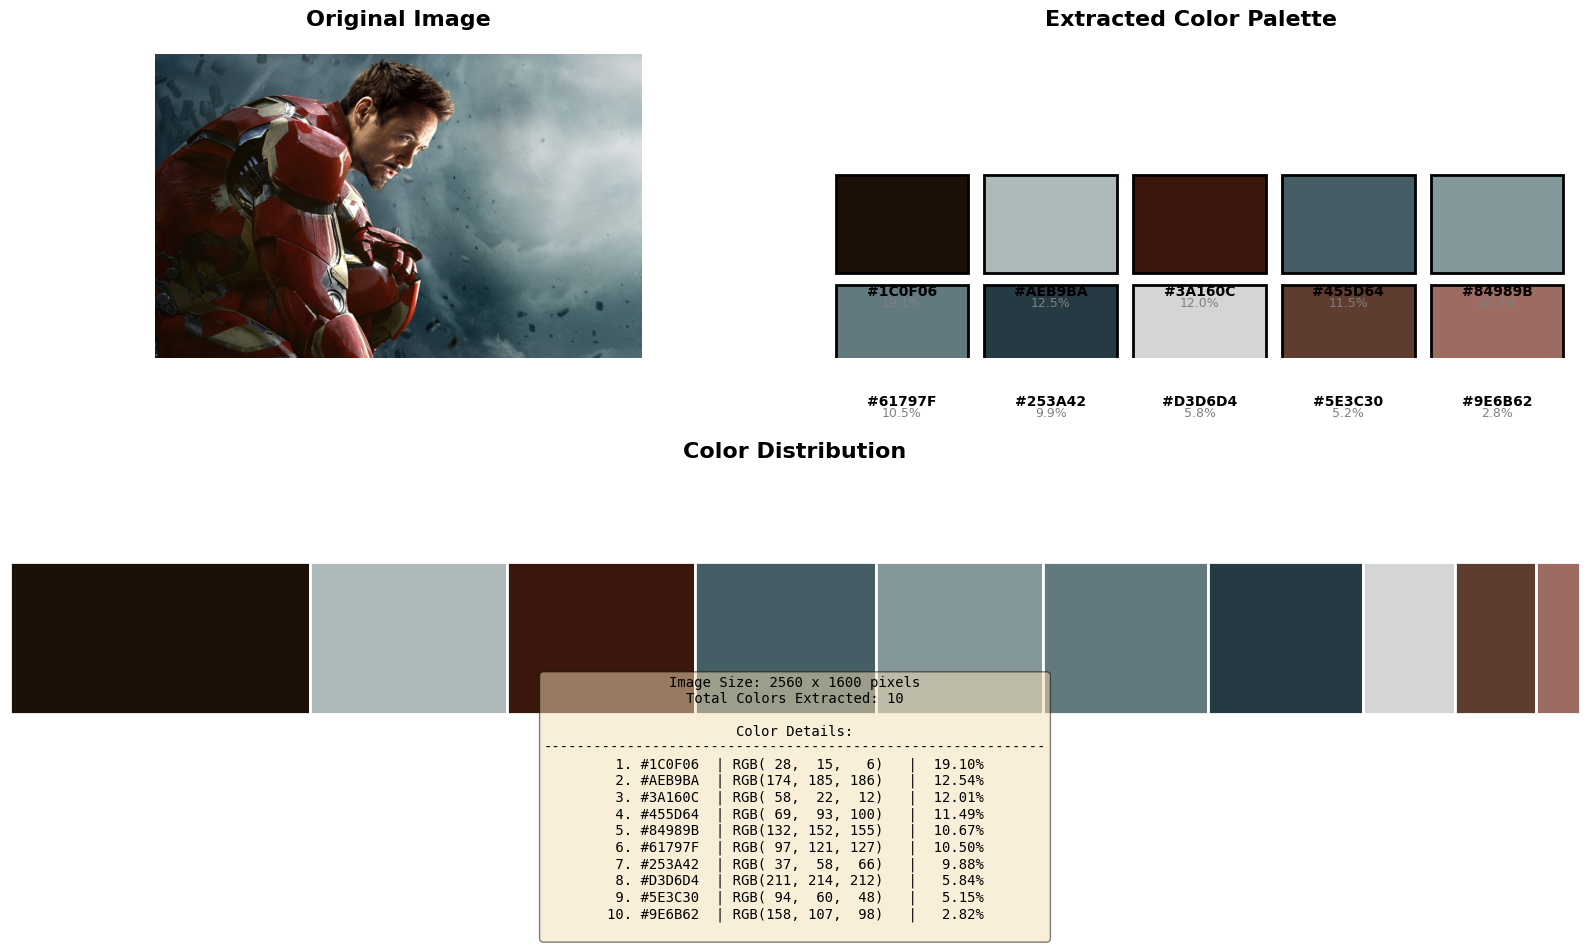

In [9]:
if __name__ == "__main__":
    # Example 1: From URL
    image_url = "https://example.com/image.jpg"
    
    # Example 2: From local file
    # image_path = "path/to/your/image.jpg"
    
    # Analyze the image
    # colors, percentages = analyze_image(image_url, n_colors=10)
    
    # Or use this to input manually:
    user_input = input("Enter image URL or file path: ")
    colors, percentages = analyze_image(user_input, n_colors=10)